# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.2.1'

# 1. Data Repository

In [2]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [3]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Initialize Setup

In [26]:
default_setup = dict(
        data=pd.DataFrame([]),
        target=None,
        train_size=0.7,  #: float = 0.7,
        test_data=None,  #: Optional[pd.DataFrame] = None,
        preprocess=True,  #: bool = True,
        imputation_type="simple",  #: str = "simple",
        iterative_imputation_iters=5,  #: int = 5,
        categorical_features=None,  #: Optional[List[str]] = None,
        categorical_imputation="constant",  #: str = "constant",
        categorical_iterative_imputer="lightgbm",  #: Union[str, Any] = "lightgbm",
        ordinal_features=None,  #: Optional[Dict[str, list]] = None,
        high_cardinality_features=None,  #: Optional[List[str]] = None,
        high_cardinality_method="frequency",  #: str = "frequency",
        numeric_features=None,  #: Optional[List[str]] = None,
        numeric_imputation="mean",  #: str = "mean",
        numeric_iterative_imputer="lightgbm",  #: Union[str, Any] = "lightgbm",
        date_features=None,  #: Optional[List[str]] = None,
        ignore_features=None,  #: Optional[List[str]] = None,
        normalize=False,  #: bool = False,
        normalize_method="zscore",  #: str = "zscore",
        transformation=False,  #: bool = False,
        transformation_method="yeo-johnson",  #: str = "yeo-johnson",
        handle_unknown_categorical=True,  #: bool = True,
        unknown_categorical_method="least_frequent",  #: str = "least_frequent",
        pca=False,  #: bool = False,
        pca_method="linear",  #: str = "linear",
        pca_components=None,  #: Optional[float] = None,
        ignore_low_variance=False,  #: bool = False,
        combine_rare_levels=False,  #: bool = False,
        rare_level_threshold=0.10,  #: float = 0.10,
        bin_numeric_features=None,  #: Optional[List[str]] = None,
        remove_outliers=False,  #: bool = False,
        outliers_threshold=0.05,  #: float = 0.05,
        remove_multicollinearity=False,  #: bool = False,
        multicollinearity_threshold=0.9,  #: float = 0.9,
        remove_perfect_collinearity=True,  #: bool = True,
        create_clusters=False,  #: bool = False,
        cluster_iter=20,  #: int = 20,
        polynomial_features=False,  #: bool = False,
        polynomial_degree=2,  #: int = 2,
        trigonometry_features=False,  #: bool = False,
        polynomial_threshold=0.1,  #: float = 0.1,
        group_features=None,  #: Optional[List[str]] = None,
        group_names=None,  #: Optional[List[str]] = None,
        feature_selection=False,  #: bool = False,
        feature_selection_threshold=0.8,  #: float = 0.8,
        feature_selection_method="classic",  #: str = "classic",
        feature_interaction=False,  #: bool = False,
        feature_ratio=False,  #: bool = False,
        interaction_threshold=0.01,  #: float = 0.01,
        fix_imbalance=False,  #: bool = False,
        fix_imbalance_method=None,  #: Optional[Any] = None,
        data_split_shuffle=True,  #: bool = True,
        data_split_stratify=False,  #: Union[bool, List[str]] = False,
        fold_strategy="stratifiedkfold",  #: Union[str, Any] = "stratifiedkfold",
        fold=10,  #: int = 10,
        fold_shuffle=False,  #: bool = False,
        fold_groups=None,  #: Optional[Union[str, pd.DataFrame]] = None,
        n_jobs=-1,  #: Optional[int] = -1,
        use_gpu=False,  #: bool = False,
        custom_pipeline=None,  #: Union[Any, Tuple[str, Any], List[Any], List[Tuple[str, Any]]] = None,
        html=True,  #: bool = True,
        session_id=None,  #: Optional[int] = None,
        log_experiment=False,  #: bool = False,
        experiment_name=None,  #: Optional[str] = None,
        log_plots=False,  #: Union[bool, list] = False,
        log_profile=False,  #: bool = False,
        log_data=False,  #: bool = False,
        silent=False,  #: bool = False,
        verbose=True,  #: bool = True,
        profile=False,  #: bool = False,
        profile_kwargs=None,  #: Dict[str, Any] = None,
    )
setup_kwargs=default_setup.update(dict(
    data=data,
    target='Purchase',
    session_id=123,
    #log_experiment=True,
    experiment_name='juice1',
    silent=True
))

In [27]:
default_setup

{'data':         Id Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE
 0        1       CH             237        1     1.75     1.99    0.00    0.00          0          0  0.500000         1.99         1.75       0.24     No   0.000000   0.000000           0.24      1
 1        2       CH             239        1     1.75     1.99    0.00    0.30          0          1  0.600000         1.69         1.75      -0.06     No   0.150754   0.000000           0.24      1
 2        3       CH             245        1     1.86     2.09    0.17    0.00          0          0  0.680000         2.09         1.69       0.40     No   0.000000   0.091398           0.23      1
 3        4       MM             227        1     1.69     1.69    0.00    0.00          0          0  0.400000         1.69         1.69       0.00     No   0.000000   0.000000           0.00

In [31]:
clf1 = setup(**default_setup)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [32]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8341,0.8922,0.7416,0.8121,0.7737,0.6433,0.6465,0.2790
lda,Linear Discriminant Analysis,0.8341,0.8946,0.7592,0.8023,0.7784,0.6462,0.6487,0.0070
ridge,Ridge Classifier,0.8328,0.0000,0.7594,0.7997,0.7767,0.6434,0.6464,0.0070
ada,Ada Boost Classifier,0.8208,0.8809,0.7349,0.7887,0.7587,0.6166,0.6196,0.0470
gbc,Gradient Boosting Classifier,0.8155,0.8875,0.7522,0.7679,0.7578,0.6090,0.6112,0.0470
catboost,CatBoost Classifier,0.8115,0.8927,0.7349,0.7691,0.7495,0.5986,0.6010,0.8940
rf,Random Forest Classifier,0.7981,0.8670,0.7243,0.7450,0.7317,0.5702,0.5730,0.1130
lightgbm,Light Gradient Boosting Machine,0.7914,0.8759,0.7139,0.7364,0.7238,0.5565,0.5578,0.0250
xgboost,Extreme Gradient Boosting,0.7901,0.8706,0.7208,0.7298,0.7241,0.5548,0.5561,0.1030
nb,Naive Bayes,0.7686,0.8404,0.7697,0.6821,0.7183,0.5241,0.5321,0.0070


# 4. Create Model

In [33]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9438,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9048,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9153,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8133,0.9115,0.7241,0.7778,0.7500,0.6014,0.6023
4,0.8533,0.9243,0.7241,0.8750,0.7925,0.6806,0.6879
5,0.8933,0.9250,0.8276,0.8889,0.8571,0.7722,0.7735
6,0.7733,0.8103,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8133,0.8590,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.7838,0.8587,0.6786,0.7308,0.7037,0.5339,0.5348
9,0.7838,0.8688,0.6429,0.7500,0.6923,0.5272,0.5309


In [34]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7841,0.6552,0.8261,0.7308,0.5908,0.6001
1,0.7867,0.7815,0.7586,0.7097,0.7333,0.5559,0.5567
2,0.8400,0.8291,0.7931,0.7931,0.7931,0.6627,0.6627
3,0.7600,0.7406,0.6552,0.7037,0.6786,0.4875,0.4883
4,0.7467,0.7616,0.7586,0.6471,0.6984,0.4824,0.4869
5,0.7733,0.7706,0.7586,0.6875,0.7213,0.5311,0.5329
6,0.6933,0.6623,0.5517,0.6154,0.5818,0.3408,0.3421
7,0.6800,0.6535,0.5714,0.5714,0.5714,0.3161,0.3161
8,0.7432,0.7523,0.6429,0.6667,0.6545,0.4504,0.4505
9,0.7703,0.7605,0.6429,0.7200,0.6792,0.5012,0.5031


In [35]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.8798,0.7414,0.7963,0.7679,0.6298,0.6309
1,0.7933,0.8993,0.6552,0.7755,0.7103,0.5514,0.5562
2,0.8733,0.9277,0.8596,0.8167,0.8376,0.7339,0.7345
3,0.6779,0.7689,0.6140,0.5738,0.5932,0.3271,0.3276
4,0.7718,0.8621,0.7193,0.6949,0.7069,0.5202,0.5204
Mean,0.7886,0.8675,0.7179,0.7314,0.7232,0.5525,0.5539
SD,0.0651,0.0539,0.0841,0.0890,0.0805,0.1347,0.1348


In [36]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [44]:
models().index

Index(['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf',
       'qda', 'ada', 'gbc', 'lda', 'et', 'xgboost', 'lightgbm', 'catboost'],
      dtype='object', name='ID')

In [46]:
ensembled_models = compare_models(include = models().index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8342,0.8933,0.7595,0.7996,0.7787,0.6463,0.6472,0.0133
lr,Logistic Regression,0.8302,0.8929,0.7386,0.8043,0.7697,0.6356,0.6374,0.0500
ridge,Ridge Classifier,0.8302,0.0000,0.7595,0.7920,0.7748,0.6387,0.6397,0.0100
catboost,CatBoost Classifier,0.8182,0.8907,0.7315,0.7812,0.7552,0.6108,0.6120,0.8700
mlp,MLP Classifier,0.8115,0.8852,0.6618,0.8172,0.7276,0.5864,0.5970,0.2533
gbc,Gradient Boosting Classifier,0.8088,0.8870,0.7177,0.7686,0.7419,0.5904,0.5916,0.0600
ada,Ada Boost Classifier,0.8034,0.8719,0.7107,0.7645,0.7358,0.5796,0.5814,0.0533
rf,Random Forest Classifier,0.7994,0.8740,0.7177,0.7505,0.7335,0.5728,0.5734,0.1500
xgboost,Extreme Gradient Boosting,0.7981,0.8651,0.7037,0.7536,0.7278,0.5676,0.5685,0.1100
lightgbm,Light Gradient Boosting Machine,0.7941,0.8651,0.7038,0.7454,0.7239,0.5600,0.5607,0.0267


# 5. Tune Hyperparameters

In [47]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8800,0.9460,0.7586,0.9167,0.8302,0.7387,0.7466
1,0.8533,0.9040,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9175,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8133,0.9145,0.6897,0.8000,0.7407,0.5962,0.6002
4,0.8533,0.9220,0.7241,0.8750,0.7925,0.6806,0.6879
5,0.9067,0.9265,0.8621,0.8929,0.8772,0.8020,0.8023
6,0.7733,0.8141,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8000,0.8598,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.8108,0.8657,0.7500,0.7500,0.7500,0.5978,0.5978
9,0.7838,0.8657,0.6429,0.7500,0.6923,0.5272,0.5309


In [48]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9018,0.7586,0.8462,0.8000,0.6848,0.6873
1,0.8267,0.9070,0.8966,0.7222,0.8000,0.6502,0.6620
2,0.8533,0.9243,0.8966,0.7647,0.8254,0.7003,0.7069
3,0.8267,0.8996,0.8621,0.7353,0.7937,0.6458,0.6519
4,0.8667,0.9423,0.8966,0.7879,0.8387,0.7259,0.7303
5,0.8533,0.9269,0.9310,0.7500,0.8308,0.7040,0.7168
6,0.7333,0.7886,0.7586,0.6286,0.6875,0.4585,0.4647
7,0.7467,0.8199,0.8571,0.6154,0.7164,0.4984,0.5209
8,0.8108,0.8734,0.8214,0.7188,0.7667,0.6088,0.6126
9,0.7973,0.8921,0.8214,0.6970,0.7541,0.5836,0.5893


# 6. Ensemble Model

In [49]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.8947,0.6552,0.8261,0.7308,0.5908,0.6001
1,0.8267,0.8819,0.7931,0.7667,0.7797,0.6369,0.6371
2,0.8267,0.9037,0.7241,0.8077,0.7636,0.6274,0.6298
3,0.7733,0.8235,0.5862,0.7727,0.6667,0.4998,0.5108
4,0.8000,0.8988,0.7586,0.7333,0.7458,0.5810,0.5812
5,0.8267,0.9037,0.7586,0.7857,0.7719,0.6322,0.6325
6,0.6667,0.7463,0.5517,0.5714,0.5614,0.2927,0.2928
7,0.7600,0.7595,0.6429,0.6923,0.6667,0.4796,0.4804
8,0.7568,0.8408,0.6786,0.6786,0.6786,0.4829,0.4829
9,0.7568,0.8234,0.6429,0.6923,0.6667,0.4756,0.4764


In [50]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.8190,0.6552,0.8261,0.7308,0.5908,0.6001
1,0.8133,0.8336,0.8621,0.7143,0.7813,0.6209,0.6293
2,0.8267,0.8996,0.7931,0.7667,0.7797,0.6369,0.6371
3,0.7867,0.8261,0.6207,0.7826,0.6923,0.5323,0.5407
4,0.8267,0.8557,0.8276,0.7500,0.7869,0.6414,0.6436
5,0.8533,0.9314,0.8276,0.8000,0.8136,0.6927,0.6930
6,0.7200,0.7346,0.6552,0.6333,0.6441,0.4134,0.4136
7,0.7467,0.7078,0.7500,0.6364,0.6885,0.4774,0.4820
8,0.7973,0.8668,0.7857,0.7097,0.7458,0.5779,0.5800
9,0.7432,0.8179,0.7143,0.6452,0.6780,0.4654,0.4671


# 7. Blend Models

In [51]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.9093,0.6897,0.8333,0.7547,0.6225,0.6292
1,0.8267,0.9025,0.8621,0.7353,0.7937,0.6458,0.6519
2,0.8267,0.9220,0.7931,0.7667,0.7797,0.6369,0.6371
3,0.8000,0.8726,0.6552,0.7917,0.7170,0.5645,0.5705
4,0.8533,0.9280,0.8621,0.7812,0.8197,0.6966,0.6990
5,0.8933,0.9228,0.8966,0.8387,0.8667,0.7779,0.7791
6,0.6933,0.7841,0.6207,0.6000,0.6102,0.3575,0.3577
7,0.7333,0.7903,0.6786,0.6333,0.6552,0.4382,0.4389
8,0.7973,0.8781,0.8214,0.6970,0.7541,0.5836,0.5893
9,0.8108,0.8587,0.7500,0.7500,0.7500,0.5978,0.5978


# 8. Stack Models

In [52]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9082,0.7241,0.8750,0.7925,0.6806,0.6879
1,0.8267,0.9220,0.8276,0.7500,0.7869,0.6414,0.6436
2,0.8667,0.9280,0.7586,0.8800,0.8148,0.7115,0.7163
3,0.7733,0.8906,0.6897,0.7143,0.7018,0.5190,0.5193
4,0.8667,0.9213,0.8276,0.8276,0.8276,0.7189,0.7189
5,0.8533,0.9082,0.8276,0.8000,0.8136,0.6927,0.6930
6,0.6933,0.7609,0.6552,0.5938,0.6230,0.3656,0.3668
7,0.7600,0.8324,0.7143,0.6667,0.6897,0.4944,0.4952
8,0.7703,0.8544,0.6786,0.7037,0.6909,0.5082,0.5084
9,0.7973,0.8700,0.6786,0.7600,0.7170,0.5599,0.5621


# 9. Analyze Model

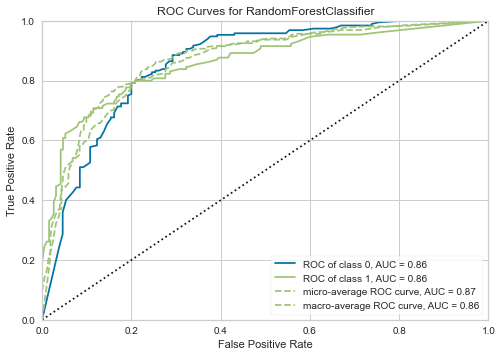

In [53]:
plot_model(rf)

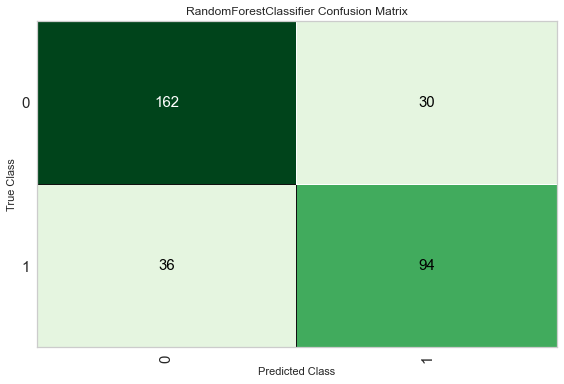

In [54]:
plot_model(rf, plot = 'confusion_matrix')

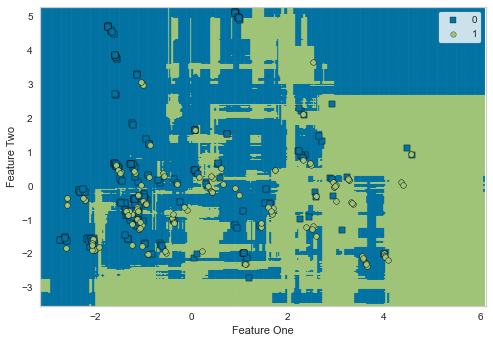

In [55]:
plot_model(rf, plot = 'boundary')

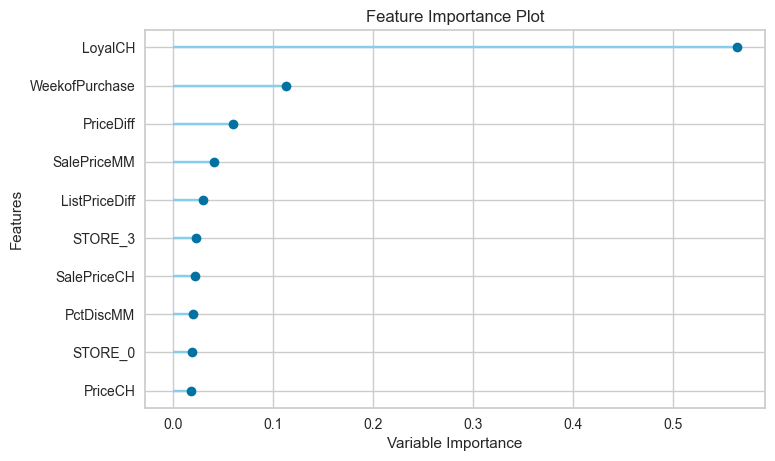

In [56]:
plot_model(rf, plot = 'feature')

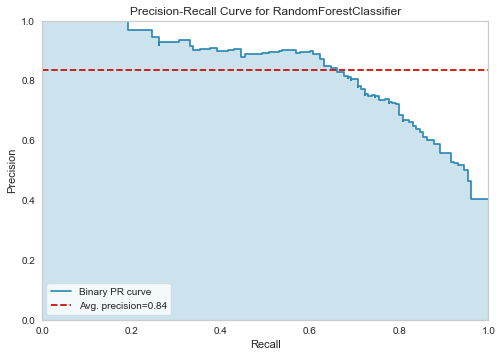

In [57]:
plot_model(rf, plot = 'pr')

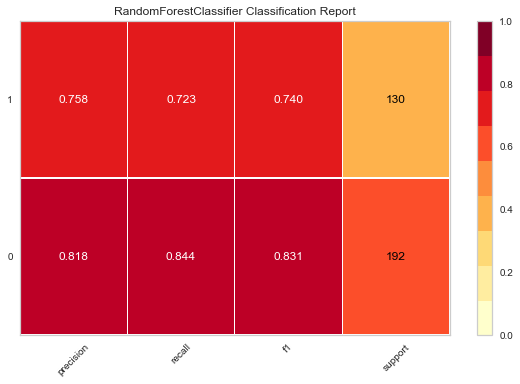

In [58]:
plot_model(rf, plot = 'class_report')

In [59]:
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


# 10. Interpret Model

In [60]:
catboost = create_model('catboost', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8292,0.8988,0.7308,0.8261,0.7755,0.6385,0.6416


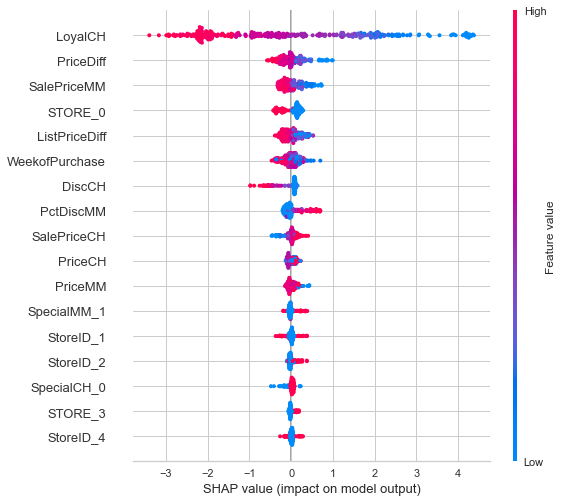

In [91]:
from matplotlib import pyplot as plt
interpret_model(
    catboost,
    "summary",
    #plot_type=None,
    show=False,
    #plot_size="auto",
)
plt.show()

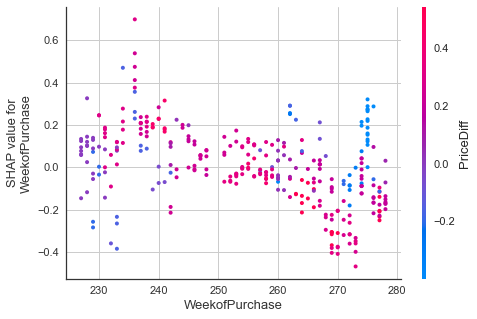

In [64]:
interpret_model(catboost, plot = 'correlation')

In [65]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [66]:
best = automl(optimize = 'Recall')
best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

# 12. Predict Model

In [67]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8230,0.9075,0.7231,0.8174,0.7673,0.6254,0.6284


,WeekofPurchase,PriceCH,PriceMM,DiscCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,ListPriceDiff,StoreID_1,StoreID_2,StoreID_4,SpecialCH_0,SpecialMM_1,STORE_0,STORE_3,Purchase,Label,Score
0,271.0,1.99,2.09,0.10,0.600000,1.69,1.89,-0.20,0.191388,0.10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MM,MM,0.5528
1,278.0,2.09,2.09,0.20,0.986489,2.09,1.89,0.20,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,CH,CH,0.9368
2,255.0,1.89,2.18,0.13,0.680000,2.18,1.76,0.42,0.000000,0.29,0.0,1.0,0.0,1.0,0.0,0.0,0.0,CH,CH,0.8544
3,258.0,1.76,2.18,0.00,0.320000,2.18,1.76,0.42,0.000000,0.42,1.0,0.0,0.0,1.0,0.0,0.0,0.0,CH,CH,0.5306
4,278.0,1.99,2.18,0.00,0.600000,2.18,1.99,0.19,0.000000,0.19,0.0,1.0,0.0,1.0,0.0,0.0,0.0,CH,CH,0.6599


In [95]:
new_data = data.copy()
new_data_y = new_data['Purchase']
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,0.5731
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM,0.5841
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.7640
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.7716
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,0.6569


# 13. Save / Load Model

In [96]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features

In [97]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=4,
               

In [100]:
predict_new

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,0.5731
1,2,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM,0.5841
2,3,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.7640
3,4,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.7716
4,5,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,0.6569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,CH,0.7876
1066,1067,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,CH,0.8289
1067,1068,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,CH,0.8446
1068,1069,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,CH,0.6333


In [101]:
import sklearn

sklearn.metrics.log_loss(y_pred=predict_new['Score'], y_true=new_data_y)

1.0364425041228826

In [110]:
from pprint import pprint
best_model

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# 15. Get Config / Set Config

In [75]:
X_train = get_config('X_train')
X_train.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,ListPriceDiff,StoreID_1,StoreID_2,StoreID_4,SpecialCH_0,SpecialMM_1,STORE_0,STORE_3
338,255.0,1.86,2.18,0.00,0.03917,2.18,1.86,0.32,0.000000,0.32,0.0,0.0,0.0,1.0,0.0,1.0,0.0
269,261.0,1.86,2.18,0.00,0.53376,2.18,1.86,0.32,0.000000,0.32,0.0,1.0,0.0,1.0,0.0,0.0,0.0
74,230.0,1.69,1.99,0.00,0.68000,1.99,1.69,0.30,0.000000,0.30,0.0,0.0,0.0,1.0,1.0,1.0,0.0
327,266.0,1.86,1.99,0.00,0.56480,1.89,1.86,0.03,0.050251,0.13,1.0,0.0,0.0,1.0,0.0,0.0,0.0
662,265.0,1.86,2.13,0.37,0.40000,2.13,1.49,0.64,0.000000,0.27,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
get_config('seed')

123

In [77]:
from pycaret.classification import set_config
set_config('seed', 999)

In [78]:
get_config('seed')

999